## Medical Insurance - Cost Prediction

## Import Basic Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Input File

In [6]:
#opening the dataset and storing in dataframe df_insure.
Input_file_name = "insurance.csv"
df_insure = pd.read_csv(Input_file_name)

Viewing the Structure of the data

In [7]:
#Printing the first five values using .head()
df_insure.head(7)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59


In [8]:
#shape of the dataframe
df_insure.shape

(1338, 7)

In [9]:
#using the describe function to get count mean and so on.
df_insure.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
#Printing the inforamtion about dataframe using .info()
df_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Creating a numerical variable for Smoking

In [11]:
#Looking for missing values count.
df_insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Correlation of the dataset.

In [12]:
#Overall Correlation
correlation = df_insure.corr()
correlation

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [13]:
#Correlation between expenses and the remaining non-categorical values 
correlation_matrix = df_insure.corr()
correlation_matrix['expenses'].sort_values(ascending=False)

expenses    1.000000
age         0.299008
bmi         0.198576
children    0.067998
Name: expenses, dtype: float64

## Scatter Plot

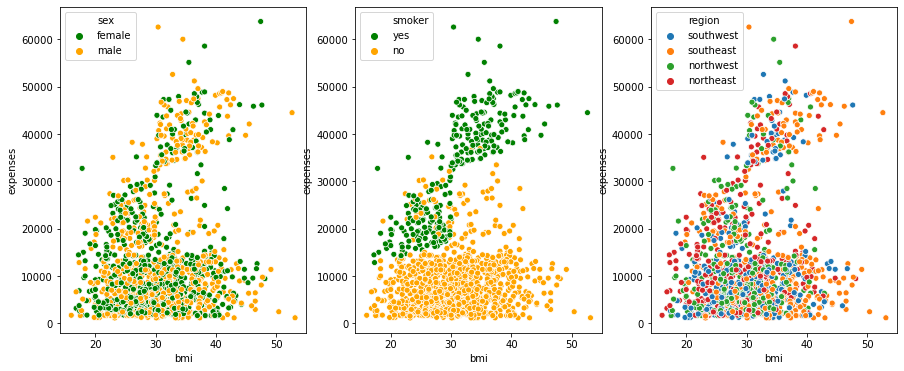

In [16]:
#Scatterplot representation of BMI vs Expenses with hue as sex, smoker and region
palette=['GREEN','ORANGE']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=df_insure,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=df_insure,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=df_insure,hue='region')

## Histogram of various Categorical features

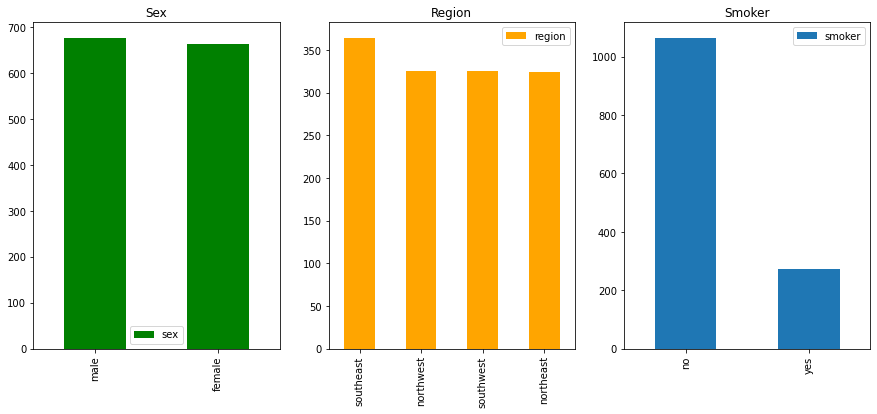

In [21]:
#Distribution of Categorical variables across disparate categories
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
df_insure['sex'].value_counts().plot(kind='bar', color = 'Green', ax=axes[0],title="Sex", legend = 'sex') 
df_insure['region'].value_counts().plot(kind='bar', color = 'Orange', ax=axes[1],title="Region", legend = 'region')
df_insure['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

In [22]:
#Changing binary categories to 1s and 0s

df_insure['sex'] = df_insure['sex'].map(lambda s :1  if s == 'female' else 0)
df_insure['smoker'] = df_insure['smoker'].map(lambda s :1  if s == 'yes' else 0)

df_insure.head()
#In sex category Men is replaced by '0' and Women by '1' and simillarly in Smoke category '1' for Smoker and '0' for non-smoker

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


## Feature Engineering 

In [23]:
#Correlation between expenses and the remaining values (including smoker and sex values)

correlation_matrix = df_insure.corr()
correlation_matrix['expenses'].sort_values(ascending=False)

expenses    1.000000
smoker      0.787251
age         0.299008
bmi         0.198576
children    0.067998
sex        -0.057292
Name: expenses, dtype: float64

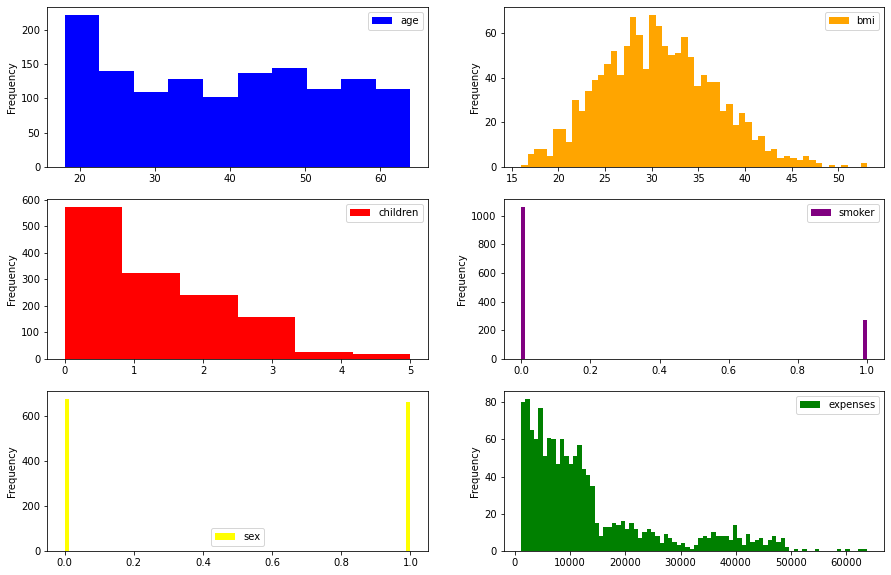

In [24]:
#Distribution of values in histogram
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,10))

df_insure.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue')
df_insure.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
df_insure.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6)
df_insure.plot(kind='hist', y='smoker', ax=axes[1][1], color = 'purple', bins = 80)
df_insure.plot(kind='hist', y='sex', ax=axes[2][0], color = 'yellow', bins = 80)
df_insure.plot(kind='hist', y='expenses', ax=axes[2][1], color = 'green', bins = 80)

## Pairplot

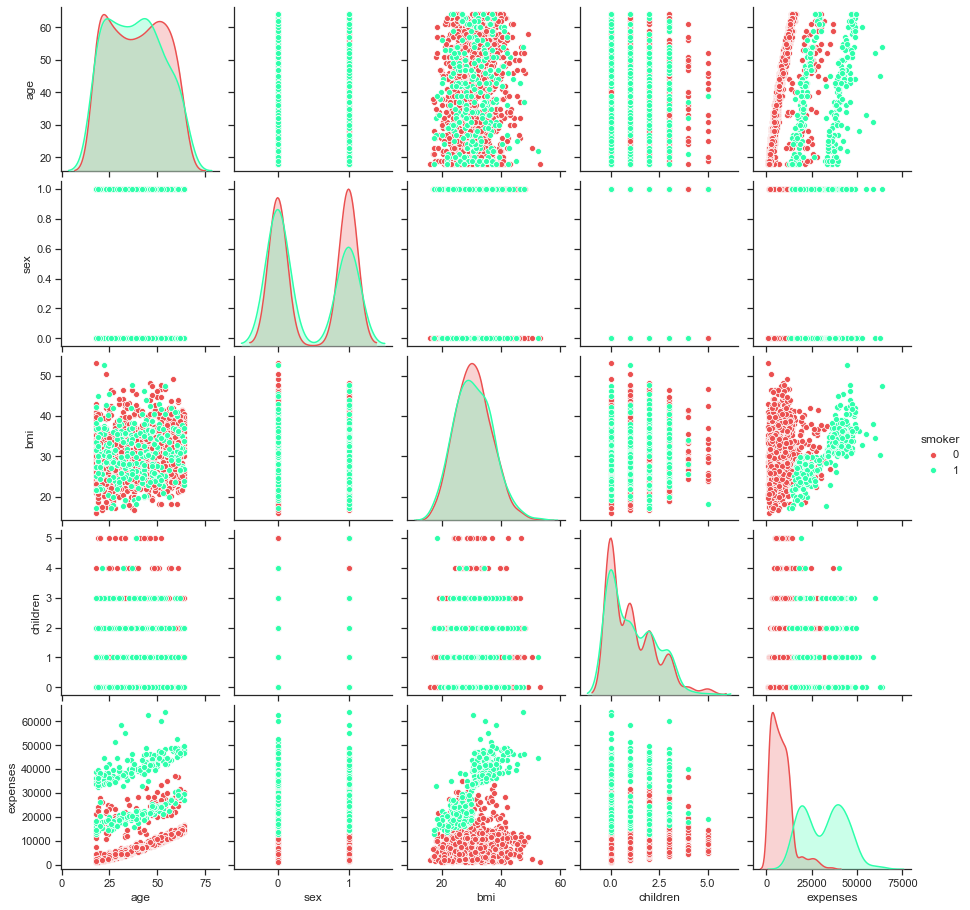

In [25]:
palette=['#EB5050','#2DFFAB'] 
sns.set(style="ticks")
sns.pairplot(data=df_insure, hue='smoker', palette=palette)

We can see that alcohol is highly correlated with quality followed by the density. Hence, we can use alcohol as strata for test set creation

Note: Correleation will check only the linear relationship between varaiables, so any other relationships will be missed. Hence, it is best to get an experts opinion in this field to select the strata, which has high impact on the traget variable.

## Splitting of Data

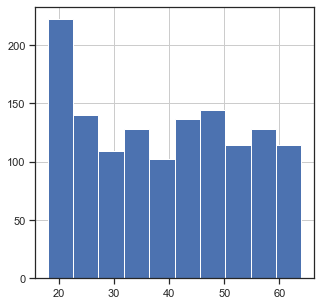

In [26]:
#Histogram for age
df_insure.age.hist(figsize=(5,5));
plt.show()

Creating bins for splitting the age into Categorical structure

In [27]:
#Spliting the age into 6 bins
df_insure['age_cat'] = pd.cut(df_insure['age'],bins=[-np.inf,20,30,40,50,60,np.inf],labels=[0,1,2,3,4,5])

In [28]:
df_insure.head()

,age,sex,bmi,children,smoker,region,expenses,age_cat
0,19,1,27.9,0,1,southwest,16884.92,0
1,18,0,33.8,1,0,southeast,1725.55,0
2,28,0,33.0,3,0,southeast,4449.46,1
3,33,0,22.7,0,0,northwest,21984.47,2
4,32,0,28.9,0,0,northwest,3866.86,2


## Using StratifiedShuffleSplit to split the data

In [29]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train,test in split.split(df_insure,df_insure['age_cat']):
    train_data = df_insure.iloc[train]
    test_data = df_insure.iloc[test]

In [30]:
test_data.head()

,age,sex,bmi,children,smoker,region,expenses,age_cat
1235,26,0,31.1,0,0,northwest,2699.57,1
1046,43,1,25.1,0,0,northeast,7325.05,3
639,56,0,33.7,4,0,southeast,12949.16,4
467,56,1,33.8,2,0,northwest,12643.38,4
700,21,1,34.9,0,0,southeast,2020.55,1


Viewing the split propotion between Tran and Test set corresponding to age.

In [31]:
#Distribution of age in Overall set and test set
print("Overall set - Distirbution of Age")
print(df_insure.age_cat.value_counts()/ len(df_insure))
print("=====================================")
print("Test set - Distirbution of Age")
print(test_data.age_cat.value_counts()/ len(test_data))

Overall set - Distirbution of Age
3    0.210015
1    0.207773
4    0.198057
2    0.192078
0    0.124066
5    0.068012
Name: age_cat, dtype: float64
Test set - Distirbution of Age
3    0.208955
1    0.208955
4    0.197761
2    0.194030
0    0.123134
5    0.067164
Name: age_cat, dtype: float64


Removing the age_cat after stratified shuffled split.

In [32]:
#Drop the age_cat column
train_data = train_data.drop('age_cat',axis=1)
test_data = test_data.drop('age_cat',axis=1)

In [33]:
test_data.head()

,age,sex,bmi,children,smoker,region,expenses
1235,26,0,31.1,0,0,northwest,2699.57
1046,43,1,25.1,0,0,northeast,7325.05
639,56,0,33.7,4,0,southeast,12949.16
467,56,1,33.8,2,0,northwest,12643.38
700,21,1,34.9,0,0,southeast,2020.55


## Data Preperation

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data

Looking for the correlation
Heatmap is the best way to visualize the correlation between variables. Let's use heatmap visulize the correlation between variables

## Heat Map

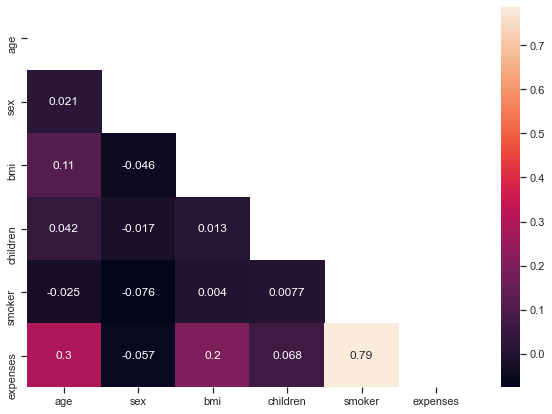

In [34]:
#Visualizing the correlation matrix using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,annot=True,mask=np.triu(correlation_matrix));

## Splitting the train data and test data between Features and Lables

In [35]:
#Split the label and training data
X_train = train_data.drop(['expenses'],axis=1)
y_train = train_data['expenses']

In [36]:
X_test = test_data.drop(['expenses'],axis=1)
y_test = test_data['expenses']

## Dimension Reduction 

In [37]:
X_train.drop(["region"], axis=1, inplace=True) 
X_test.drop(["region"], axis=1, inplace=True) 

In [38]:
X_train.head()

,age,sex,bmi,children,smoker
75,57,0,34.0,0,0
269,49,0,25.8,1,0
461,42,0,30.0,0,1
443,59,1,36.5,1,0
557,34,0,34.2,0,0


## Feature Transformation - Standard Scaler

We have used Column Transform Pipeline here.

In [39]:
#Importing the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
#column transformer will scale given columns and drop others
transormer = ColumnTransformer([('scaler',scaler,[0,1,2,3,4])]) 

#Scaling the data set
insure_data_tr = transormer.fit_transform(X_train)

In [40]:
pd.DataFrame(insure_data_tr).head()

,0,1,2,3,4
0,1.269593,-0.979646,0.554839,-0.914211,-0.508747
1,0.699588,-0.979646,-0.797126,-0.086626,-0.508747
2,0.200834,-0.979646,-0.104656,-0.914211,1.965613
3,1.412094,1.020777,0.967023,-0.086626,-0.508747
4,-0.369171,-0.979646,0.587813,-0.914211,-0.508747


In [41]:
pd.DataFrame(X_train).head()

,age,sex,bmi,children,smoker
75,57,0,34.0,0,0
269,49,0,25.8,1,0
461,42,0,30.0,0,1
443,59,1,36.5,1,0
557,34,0,34.2,0,0


## Model Selection

We have prepared the data for Machine Learning Model. Now, lets shortlist the best Machine Learning algorithm for our model. Let's analyze various algorithms without any hyperparamter tuning to shortlist the best model.

In [42]:
#Importing libraries of machine learning algorithm 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

#Importing libararies for selecting model
from sklearn.model_selection import cross_val_score

In [43]:
#Creating a list of models that needs to be analysed
models = [('Linear Regression',LinearRegression()),
          ('Decision Tree',DecisionTreeRegressor()),
          ('Random Forest',RandomForestRegressor()),
          ('SVM',SVR())]

## Formulating RMSE Scores for various Regression Algorithms based on Training Data and determining the best on the Average RMSE score

In [44]:
#Performing cross validation on all models to find the best one
rmse_score = []
model_name = []

#Creating a DataFrame to store performance of each model
df_results = pd.DataFrame(columns=['Name','RMSE AVG','RMSE STD'])

#Performing cross validation for each model to find the best model
i=0
for name,model in models:
    #Cross Validation
    scores = cross_val_score(model,insure_data_tr,y_train,cv=10,
                             scoring='neg_mean_squared_error')
    scores = np.sqrt(-scores)
    #y_pred_model_train = model.predict(insure_data_tr)
    #r2scores = r2_score(y_train, y_pred_model_train)
    #Appending the result to list
    rmse_score.append(scores)
    model_name.append(name)
    #Appending the performance to the Dataframe
    df_results.loc[i] = [name,
                         scores.mean(),
                        scores.std()]
    i += 1
#Displaying the performance of the cross validation    
df_results.sort_values(by=['RMSE AVG'])

,Name,RMSE AVG,RMSE STD
2,Random Forest,4980.030592,714.338624
0,Linear Regression,6048.217728,659.393488
1,Decision Tree,6696.910196,728.490113
3,SVM,12582.273847,1103.574877


In [45]:
#accuracy_model_train = r2_score(y_train, y_pred_model_train)
#   print("Training Accuracy: ", accuracy_model_train)

## Boxplot of RMSE results

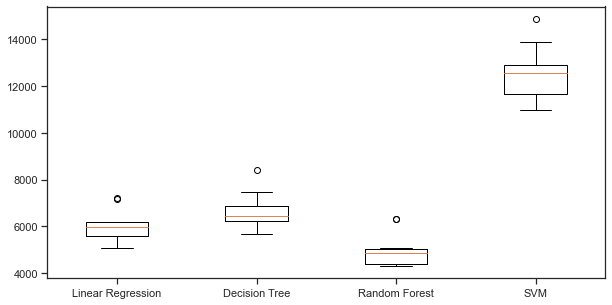

In [46]:
#Plotting the test results as boxplot
plt.figure(figsize=(10,5))
plt.boxplot(rmse_score)
plt.xticks(range(1,len(model_name)+1),model_name)
plt.show()

Based on the results and Boxplots we can clearly determine that Random Forest Regressor outperforms others.
We choose Random Forest Regressor as our Best model to move forward.

## Hyperparameter tuning - Gridsearch CV

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 100, 150, 300, 400], 'max_features': [2, 4, 6, 8], 'max_depth':[5,10,15]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True,n_jobs=2,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  58 tasks      | elapsed:   16.2s
[Parallel(n_jobs=2)]: Done 208 tasks      | elapsed:   46.8s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 150, 300, 400]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [71]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 4, 'n_estimators': 100}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, max_features=4)

Model is built with the best_estimator_ as parameters of Random Forest Regressor

In [73]:
best_model = grid_search.best_estimator_

## Sklearn Pipeline

In [74]:
#Importing Pipeline library
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([('scaler', transormer),
                            ('model', best_model)])
model_pipeline.fit(X_train,y_train);

## Evaluation with Test set and determining the Final RMSE value and determing the model performance after Hyper parameter tuning

In [75]:
#evaluate your system on test set

#X_test = strat_test_set.drop("quality", axis=1)
#y_test = strat_test_set["quality"].copy()

#X_test_prepared = model_pipeline.transform(X_test)
#final_predictions = final_model.predict(X_test_prepared)
final_predictions = model_pipeline.predict(X_test)


final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [76]:
final_rmse

4362.4028131335845

In [77]:
pd.DataFrame(final_predictions).head()

,0
0,4397.689997
1,8630.678369
2,15798.306798
3,14244.357157
4,3104.517211


## Comparison with the Actual Values in Test set

In [78]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})
results

,Actual,Predicted
1235,2699.57,4397.689997
1046,7325.05,8630.678369
639,12949.16,15798.306798
467,12643.38,14244.357157
700,2020.55,3104.517211
...,...,...
1265,26926.51,25508.437331
347,8334.46,9385.269592
1205,5116.50,6281.908971
768,14319.03,14308.386813


## Creating the Output file with Actual and Predicted values (Expenses)

In [79]:
results_csv_data = results.to_csv('results.csv', index = True) 

## Backup the model

Model should be preserved to be used further on app or website.Let us pickle the model

In [70]:
import pickle

with open('expense_prediction_model.pkl','wb') as file:
    pickle.dump(model_pipeline,file)